## Quantification of RAD21 protein levels via IF

- Fixation: Ice cold Methanol 5 min
- 1ary ab: Rabbit $\alpha$-RAD21 (ab154769) 1:500 overnight 4oC
- 2ary ab: Goat $\alpha$-rabbit 488 A11034 1:500 1h RT


Cell segmentation: Using CellProfiller 2.2, nuclei are indentified as primary object, cells as secondary objects (using unspecific binding background of the antibody as input image) and cytoplasm as terciary objects (region defined as cell tht is not part of the nucleous).

### RAD21 protein quantification method: 

To normalise across differences in fluorescence intensity across samples, proteins levels for each cell were defined as:

\begin{align*}
{RAD21}_{level} =  Nu - Cyt
\end{align*}

were $Nu$ and $Cyt$ are the mean intensity of each region in the maximum projection of the images in the nucleous and the cytoplasm, respectively.

##### In short:
Then,  the RAD21 level for each cell is defined as the nuclear intensity minus the cytoplasmic to normalise against vaiable levels of background.


### Statistical Tests
t-test as implemented in HypothesisTests.jl (UnequalEqualVarianceTTest function)

In [12]:
ENV["Code"] = "../../Code"
for ii in readdir(ENV["Code"])
push!(LOAD_PATH, string(ENV["Code"],"/",ii));
end

using CSV
using DataFrames
import Pandas
using NoLongerProblems_Pandas
using Statistics
using Seaborn
using HypothesisTests

using PrettyPlotting
using Seaborn



root = "/Volumes/lymphdev\$/IreneR/Confocal/IF_rad21/4Ag19_GOODONE/CP_results"

image = CSV.read(root * "/MyExpt_Image.csv", DataFrames.DataFrame)
nu = CSV.read(root * "/MyExpt_Nuclei.csv", DataFrames.DataFrame);

In [13]:
# Load Nuclei Data

nu = innerjoin(image[!,[:FileName_DAPI, :ImageNumber]], nu, on = :ImageNumber, makeunique=true)
nu[!,:IF] = ["Rad21KO" for ii in nu[!,:FileName_DAPI]]
nu[!,:Genotype] = [ if split(ii, "_")[6] == "RAD21" "Rad21KO" else split(ii, "_")[6] end for ii in nu[!,:FileName_DAPI]]
nu[!,:Rep] = [split(ii, "_")[7] for ii in nu[!,:FileName_DAPI]];

In [14]:


# Load Cytoplasm Data
cyt = CSV.read(root * "/MyExpt_Cytoplasm.csv", DataFrames.DataFrame)
cyt = innerjoin(image[!,[:FileName_DAPI, :ImageNumber]], cyt, on = :ImageNumber)
cyt[!,:IF] = ["Rad21" for ii in cyt[!,:FileName_DAPI]]
cyt[!,:Genotype] = [ if split(ii, "_")[6] == "RAD21" "Rad21KO" else split(ii, "_")[6] end for ii in cyt[!,:FileName_DAPI]]
cyt[!,:Rep] = [split(ii, "_")[7] for ii in cyt[!,:FileName_DAPI]];


## Number of cells per sample

In [15]:
n = nu
n[!,:Sample] = [string(n[ii, :Genotype],"__", n[ii, :Rep]) for ii in 1:nrow(n)]
df = DataFrames.DataFrame()
 df[!,:Samples] = unique(n[!,:Sample])

df[1, :Samples] = "Control__Neg"
df[!,:N] = [sum(n[!,:Sample] .== ii ) for ii in unique(n[!,:Sample])]
df

,Samples,N
,String,Int64
1,Control__Neg,26
2,Rad21KO__1,120
3,Rad21KO__2,87
4,Rad21KO__3,66
5,WT__1,121
6,WT__2,175
7,WT__3,157


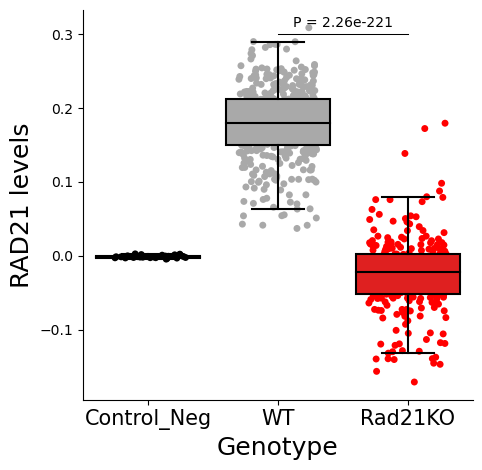

In [16]:
f = "Intensity_MeanIntensity_Alexa488"

nu[!,:CTCF] = nu[!,f] .- cyt[!,f] 
n = nu[nu[!,:Rep] .!= "Previousday", :]


Seaborn.boxplot(data = Pandas.DataFrame(n), y = "CTCF", x = "Genotype", 
    order = ["CtcfKO","WT", "Rad21KO"], 
    #hue = "Rep",
    palette = ["black", "darkgray", "red"],
    showfliers = false)

Seaborn.stripplot(data = Pandas.DataFrame(n), y = "CTCF", x = "Genotype", 
   order = [ "CtcfKO","WT", "Rad21KO"], 
    #hue = "Rep",
    palette = ["black","darkgray", "red"], 
    zorder=0, jitter = 0.3)



plot([1, 2], [0.3, 0.3], c = "black", lw = 0.75)
annotate("P = 2.26e-221", xy = [1.5, 0.315], va = "center", ha = "center")

ylabel("RAD21 levels", fontsize = 18)
xticks(0:2, ["Control_Neg", "WT", "Rad21KO"], fontsize = 15)
xlabel("Genotype", fontsize =18)
pretty_axes2()
plt.tight_layout()
squareplot()
savefigwithtext("IF_Rad21_levels.svg")

In [17]:
import Pkg
Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] CSV v0.8.4
  [a93c6f00] DataFrames v0.22.7
  [b4f34e82] Distances v0.10.2
  [31c24e10] Distributions v0.23.12
  [09f84164] HypothesisTests v0.10.2
  [7073ff75] IJulia v1.23.2
  [4138dd39] JLD v0.12.3
  [093fc24a] LightGraphs v1.3.5
  [f8716d33] MultipleTesting v0.4.1
  [eadc2687] Pandas v1.4.0
  [92933f4c] ProgressMeter v1.5.0
  [438e738f] PyCall v1.92.2
  [d330b81b] PyPlot v2.9.0
  [6f49c342] RCall v0.13.10
  [3646fa90] ScikitLearn v0.6.3
  [d2ef9438] Seaborn v0.4.1
